<a href="https://colab.research.google.com/github/Nareshchinna07/FMML_COURSE_ASSIGNMENT_3/blob/main/FMML_Aug22_M1Lab3_Terms%26Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 3<br>
Module Coordinator: Amit Pandey amit.pandey@research.iiit.ac.in <br>
<br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing. We will also explore how data augmentation affects accuracy.

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. 

Let us download and examine the dataset. 

In [116]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Here is a function for calculating the 1-nearest neighbours

In [117]:
type(dataset), dataset.DESCR

(sklearn.utils.Bunch,
 '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousan

In [118]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel



5,5
6,6
8,9


0,0

(0, 0)

We will also define a 'random classifier', which randomly allots labels to each sample

In [119]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [120]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [121]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [122]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [123]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [124]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


## Interesting: See how train accuracy of nearest neighbour is 1 i.e. 100%. Ponder and Explain.

For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [125]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. 

Now let us try another random split and check the validation accuracy

In [126]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits. 
We notice that the accuracy is different for each run, but close together. 

Now let us compare it with the accuracy we get on the test dataset. 

In [127]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced? 

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

 ANSWER FOR QUESTION:01

In [128]:
def findPoints(low, high, diff):
  accuracyNN = []
  accuracyRandom = []
  datasize = []
  for i in range(low, high, diff):
    datasize.append(100-i)
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)

    valPredNN = NN(traindata, trainlabel, valdata)
    valAccuracyNN = Accuracy(vallabel, valPredNN)
    accuracyNN.append(valAccuracyNN)

    valPredRandom = RandomClassifier(traindata, trainlabel, valdata)
    valAccuracyRandom = Accuracy(vallabel, valPredRandom)
    accuracyRandom.append(valAccuracyRandom)

  return accuracyNN, accuracyRandom, datasize

In [129]:
#for different values of validation size lets see the accuracy
accuracyNN, accuracyRandom, valdatasize = findPoints(1,100, 5)

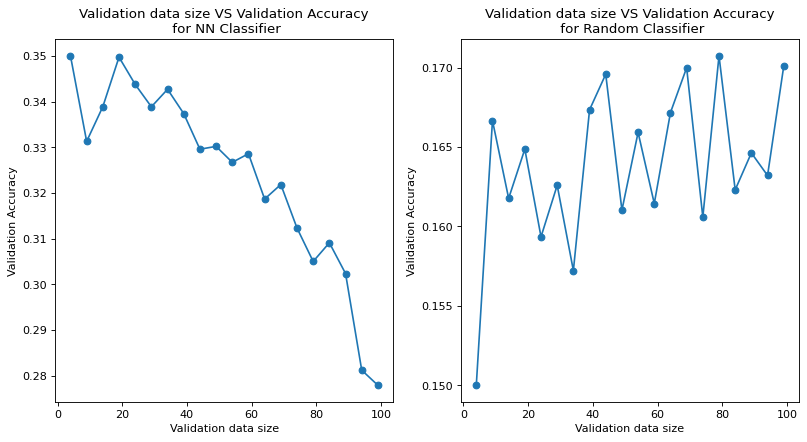

In [130]:
plt.figure(figsize=(12,6),dpi = 80)
plt.subplot(1,2,1)
plt.scatter(valdatasize, accuracyNN)
plt.plot(valdatasize, accuracyNN)
plt.title("Validation data size VS Validation Accuracy\n for NN Classifier")
plt.xlabel("Validation data size")
plt.ylabel("Validation Accuracy")

plt.subplot(1,2,2)
plt.scatter(valdatasize, accuracyRandom)
plt.plot(valdatasize, accuracyRandom)
plt.title("Validation data size VS Validation Accuracy\n for Random Classifier")
plt.xlabel("Validation data size")
plt.ylabel("Validation Accuracy")

plt.show()


From the subplot 1 we can observe that the accuracy of the model decreases with the increase in size of validation data. Usually it is considered good to have a validation data set of size 10% to 25% so that we can validate that the model is not overfitted. Conclusion - Increasing the size of validation data set reduces the accuracy, and there exists a value for validation set size for which the accuracy is high. if the validation accuracy is more or less than that value the accuracy comes out less.

ANSWER FOR QUESTION:02

In [131]:
def findPointsVal(low, high, diff):
  accuracyNN = []
  accuracyRandom = []
  datasize = []
  for i in range(low, high, diff):
    datasize.append(100-i)
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)

    valPredNN = NN(traindata, trainlabel, valdata)
    valAccuracyNN = Accuracy(vallabel, valPredNN)
    accuracyNN.append(valAccuracyNN)

    valPredRandom = RandomClassifier(traindata, trainlabel, valdata)
    valAccuracyRandom = Accuracy(vallabel, valPredRandom)
    accuracyRandom.append(valAccuracyRandom)

  return accuracyNN, accuracyRandom, datasize

def findPointsTest(low, high, diff):
  accuracyNN = []
  accuracyRandom = []
  datasize = []
  for i in range(low, high, diff):
    datasize.append(100-i)
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)

    testPredNN = NN(traindata, trainlabel, testdata)
    testAccuracyNN = Accuracy(testlabel, testPredNN)
    accuracyNN.append(testAccuracyNN)

    testPredRandom = RandomClassifier(traindata, trainlabel, testdata)
    testAccuracyRandom = Accuracy(testlabel, testPredRandom)
    accuracyRandom.append(testAccuracyRandom)

  return accuracyNN, accuracyRandom, datasize

In [132]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)

In [133]:
#for different values of validation size lets see the accuracy
testaccuracyNN, testaccuracyRandom, valdatasize = findPointsTest(1,100, 5)
valaccuracyNN, valaccuracyRandom, valdatasize = findPointsTest(1,100,5)

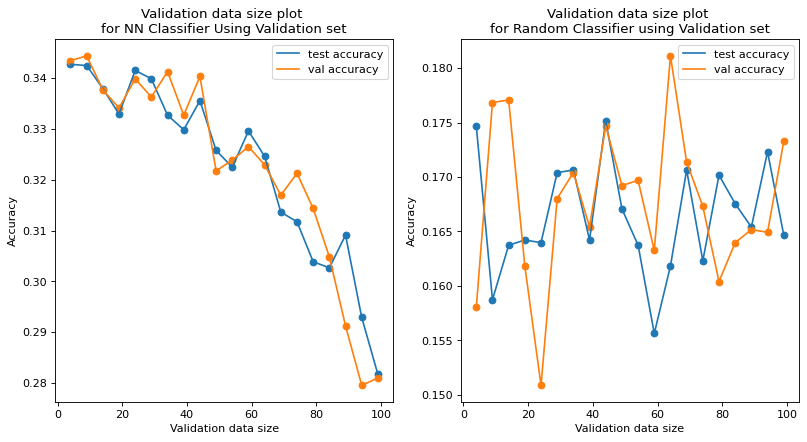

In [134]:
plt.figure(figsize=(12,6),dpi = 80)
plt.subplot(1,2,1)
plt.scatter(valdatasize, testaccuracyNN)
plt.plot(valdatasize, testaccuracyNN, label="test accuracy")
plt.scatter(valdatasize, valaccuracyNN)
plt.plot(valdatasize, valaccuracyNN, label='val accuracy')
plt.legend()
plt.title("Validation data size plot \nfor NN Classifier Using Validation set")
plt.xlabel("Validation data size")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.scatter(valdatasize, testaccuracyRandom)
plt.plot(valdatasize, testaccuracyRandom,label="test accuracy")
plt.scatter(valdatasize, valaccuracyRandom)
plt.plot(valdatasize, valaccuracyRandom,label='val accuracy')
plt.title("Validation data size plot \nfor Random Classifier using Validation set")
plt.xlabel("Validation data size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here there is no affect of validation set size on the test accuracy. Validation dataset here is just a way to check if the NN classifier is able to predict the values well or not.

**Answer** **for** **Question**:**03**

1.The size of the validation set according to the graphs obtained from the experiment would be 15% of the total training dataset we have. Usually also the values for the validation dataset are made from 10 to 25% of the training data as per the size of the total training data that we have for the experiment.

2.The model needs a fairly large dataset for it to be trained well and understand the data features, but it may lead to overfitting of the model so to reduce the chances of overfitting we need a validation set which in itself is small because larger values may lead to overfitting on even the validation dataset itself.

3.A very small values of validation dataset less than 10% may be insufficient to serve as a measure to check overfitting or to increase test accuracy.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. 

In [135]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [136]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3433913404726202
test accuracy is  0.3446139180171592


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


**Answer for Question :01**

As we know that training the model using the dataset will always give newer results but slight difference in test and validation accuracy. To get a validation accuracy which is an average of certain number of times we trained the model will surely give us good and consistent results. Because the value will be obtained by many different values of accuracy over a number of iteration for which the model is being trained.

**Answer for Question :02**

If the average validation accuracy is good than we can say that the model will perform well on the test accuracy. Better the value of validation accuracy better will be the test accuracy. The test accuracy will be lower than validation accuracy but will not abrubtly give great variation in accuracy, until the test data has large variation in values than on which the model is trained.

**Answer for Question :03**

In [137]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations

In [138]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [139]:
def getAccuracyDetails(iterationVal):
  accValData = []
  accTestData = []
  iterations = []
  for i in range(10, iterationVal, 10):
    print('Predicting for Iteration ', i)
    avgValAccuracy = AverageAccuracy(alltraindata, alltrainlabel, 75/100, i, classifier = NN)
    testPred = NN(alltraindata, alltrainlabel, testdata)
    avgTestAccuracy = Accuracy(testlabel, testPred)
    iterations.append(i)
    accValData.append(avgValAccuracy)
    accTestData.append(avgTestAccuracy)
  return iterations, accValData, accTestData

In [ ]:
iterations, accValData, accTestData = getAccuracyDetails(51)

Predicting for Iteration  10


In [ ]:
plt.scatter(iterations, accValData)
plt.plot(iterations, accValData, label = "Val accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.scatter(iterations, accTestData)
plt.plot(iterations, accTestData, label = "Test accuracy")
plt.title("Iteration VS Accuracy")
plt.legend()

plt.show()

Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

The accuracy of the model increses with the increase in number of iterations. But with a very large number of iteration there are chances of overfitting so we need to find an optimal value of iterations on the basis of what model and dataset are we working on

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 70/100)
traindata, trainlabel, valdata, vallabel = split(traindata, trainlabel, 70/100)
traindata, trainlabel, valdata, vallabel = split(traindata, trainlabel, 70/100)

In [ ]:
traindata.shape

In [ ]:
valdata.shape

Now we have a small training dataset and validation set lets check if the values are still good for different iterations or not

In [ ]:
def getAccuracyDetails(iterationVal):
  accValData = []
  accTestData = []
  iterations = []
  for i in range(10, iterationVal, 10):
    print('Predicting for Iteration ', i)
    avgValAccuracy = AverageAccuracy(traindata, trainlabel, 75/100, i, classifier = NN)
    testPred = NN(traindata, trainlabel, testdata)
    avgTestAccuracy = Accuracy(testlabel, testPred)
    iterations.append(i)
    accValData.append(avgValAccuracy)
    accTestData.append(avgTestAccuracy)
  return iterations, accValData, accTestData

In [ ]:
iterations, accValData, accTestData = getAccuracyDetails(51)

In [ ]:
plt.scatter(iterations, accValData)
plt.plot(iterations, accValData, label = "Val accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.scatter(iterations, accTestData)
plt.plot(iterations, accTestData, label = "Test accuracy")
plt.title("Iteration VS Accuracy")
plt.legend()

plt.show()

we can see that with less data the accuracy of the validation set is less as compared with the time when the dataset size was more. Here in our case it doesn't effect much as we are using a classifier based on neighbor. But if we were to use a model for extracting the features and than use those features to predict and value, and save the now obtained weights than we might get lesser accuracy as we go on decreasing the data size, number of iteration helps the model to understand the data and find features or values to improve its accuracy so if we decrease the number of datasets and increase the iteration it will helps uptil a certain point and than will start decreasing as the model will start to overfit. But its a good choice to increase the iterations if dataset is sma

## Now let us see how augmentation affects accuracy. We will pick components from what we studied in the last module

we will experiment with MNIST dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print(train_X[0].shape,train_y[0])



In [ ]:
train_X = train_X/255
test_X = test_X/255

#train_X[0].shape, train_X[0]

In [ ]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

In [ ]:
## Augmentation functions:



def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.


def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  traindata = traindata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [ ]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

def augShear(sample, shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = shear(sample[ii], amt[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.




In this lab, we will use the image pixels themselves as features, instead of extracting features. Each image has 28*28 pixels, so we will flatten them to 784 pixels to use as features. Note that this is very compute intensive and will take a long time.

Let us check the baseline accuracy on the test set without any augmentations. We hope that adding augmentations will help us to get better results.

In [ ]:
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without augmentation is ', Accuracy(test_y, testpred))

Let us try to improve this accuracy using augmentations. When we create augmentations, we have to make sure that the changes reflect what will naturally occur in the dataset. For example, we should not add colour to our samples as an augmentation because they do not naturally occur. We should not also flip the images in MNIST, because flipped images have different meanings for digits.

Let us augment the whole dataset and see if this improves the test accuracy

**Augmentation 1: rotation**

Let us try rotating the image a little. We will use skimage library for this.

In [ ]:
plt.imshow(train_X[2], cmap='gray')
plt.show()
plt.imshow(rotate(train_X[2],45), cmap='gray')

After rotating, the the class of the image is still the same. Let us make a function to rotate multiple images by random angles. We want a slightly different image every time we run this function. So, we generate a random number between 0 and 1 and change it so that it lies between -constraint/2 and +constraint/2

In [ ]:
def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  angle = rng.random(len(sample)) # generate random numbers for angles
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.

This function returns a slightly different image each time we call it. So we can increase the number of images in the sample by any multiple.

In [ ]:
sample = train_X[20]
angleconstraint = 70
# show the original image
plt.imshow(sample, cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show an augmented image
plt.subplot(1,3,2)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show another augmented image from the same sample
plt.subplot(1,3,3)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # one more image from the same sample

Let us augment the whole dataset and see if this improves the test accuracy

In [ ]:
# hyperparameters
angleconstraint = 60
naugmentations = 5

# augment
augdata = train_X # we include the original images also in the augmented dataset
auglabel = train_y
for ii in range(naugmentations):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconstraint))) # concatenate the augmented data to the set
  auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

# check the test accuracy
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation augmentation is ', Accuracy(test_y, testpred))

The angle constraint is a hyperparameter which we have to tune using a validation set. (Here we are not doing that for time constraints). Let us try a grid search to find the best angle constraint.

In [ ]:
angleconstraints = [0,10,20,30,40,50,60,70,80,90] # the values we want to test
accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here

for ii in range(len(angleconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)

In [ ]:
angleconstraints = [30] # the values we want to test
accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here

for ii in range(len(angleconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment
  print(augdata.shape)
  print(train_X.shape)
  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)

Let us see the best value for angle constraint: (Ideally this should be done on validation set, not test set)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c='red')

Let us do a grid search to find the best shear constraint.

In [ ]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0] # the values we want to test
accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here

for ii in range(len(shearconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ',shearconstraints[ii], ' is ', accuracies[ii], flush=True)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c='red')

We can do multiple augmentations at the same time. Here is a function to do both shear and rotation to the sample. In this case, we will have two hyperparameters.

In [ ]:
def augRotateShear(sample, angleconstraint, shearconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  angle = rng.random(len(sample)) # generate random numbers for angles
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(shear(sample[ii], amt[ii]), angle[ii]) # first apply shear, then rotate
  return np.squeeze(nsample) # take care if the input had only one sample.

Since we have two hyperparameters, we have to do the grid search on a 2 dimensional matrix. We can use our previous experience to inform where to search for the best hyperparameters. 

In [ ]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6] # the values we want to test
angleconstraints = [0,10,20,30,40,50,60] # the values we want to test
hyp = cartesian((shearconstraints, angleconstraints)) # cartesian product of both

accuracies = np.zeros(len(hyp), dtype=np.float) # we will save the values here

for ii in range(len(hyp)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after augmentation shear:',hyp[ii][0], 'angle:',hyp[ii][1], ' is ', accuracies[ii], flush=True)

Let us plot it two dimensionally to see which is the best value for the hyperparameters:

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
im = ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno') 
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

It seems that rotation and shear don't mix! The best accuracy is when rotation is zero.

## Questions
Try these questions for better understanding. You may not be able to solve all of them. 
1. What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?
2. Can you increase the accuracy by increasing the number of augmentations from each sample?
3. Try implementing a few augmentations of your own and experimenting with them. A good reference is <a href=https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/>here. </a>
4. Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?

Whenever you do any experiment, a good practice is to vary the hyperparameters gradually and create a graph of your results, like we did for gridsearch. 

**ANSWER OF QUESTION 01**

1.When taking only the hyperparameter angle constraint the highest accuracy obtained was 0.6822 or 68.22% when the angle constraint value was 20, the resulting accuracy is much better than when we didn't apply any augmentation on the dataset. Without augmenation the accuracy was 64.72% 2.When taking only the hyperparameter shear constraint the highest accuracy obtained was 65.66% at 0.8 and the parameter value was 0.8, without augmentation the value of accuracy was 64.72% which wasn't that bad considering the accuracy results obtained for many other higher values of augmentation through shear.
3.when using both at the same time in grid search we get the output highest for the shear constraint value of 1.6 and rotate angle of 0, the accuracy obtained is 63.45%,

In case of rotation the accuracies was least in case of original data, but was higher for various values of augmentation. In case of shear the accuracies was least at 2.0 value of constraint but in case of original data the accuracy was not that bad. Now decrease in accuracy as we keep on increasing the value of hyperparameter can be because after a certain value the data set is not same at all like roating 7 by 90 degrees or shearing with value of 2 makes the data completely different.

In [ ]:
import pandas as pd

In [ ]:
dataframe = pd.DataFrame(hyp, columns = ['shear','angle'])
dataframe['accuracy'] = accuracies
dataframe = dataframe.sort_values(by = 'accuracy', ascending = False)

In [ ]:
dataframe[:15]

**Answer for Question :02**

In [ ]:
def findAcc(j, angleconstraint = 0):
  augdata = train_X
  auglabel = train_y
  for ii in range(j):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraint)))
    auglabel = np.concatenate((auglabel, train_y))

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  return Accuracy(test_y, testpred)

angleconstraint = 20
accuracy = {}
for i in range(naugmentations):
  for j in range(i):
    accuracy[i] = findAcc(j, angleconstraint)

In [ ]:
plt.plot(list(accuracy.keys()), list(accuracy.values()))
plt.scatter(list(accuracy.keys()), list(accuracy.values()))
plt.xlabel("Number of Augmentations")
plt.ylabel("Accuracy")

Above is the plot for number of augmentation vs accuracy for the rotation with angle constraint 20 which we got highest accuracy for previously, and we can see that for higher values of augmentation we got a fairly good result of accuracy so we can say that with increase in number of augmentation the accuracy is increased. But that is not always true as for very higher values like we can see here more than 6 or 7 the accuracy is getting bad.

In [ ]:
def findAccShear(shearconstraints, naugmentations):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  return Accuracy(test_y, testpred)

#for 0.8 we got highest accuracy so lets try for different augmentation using this value only as constraint
shearconstraints = 0.8
naugmentations = 10
accuracy = {}
for i in range(naugmentations):
  for j in range(i):
    accuracy[i] = findAccShear(shearconstraints,j)

In [ ]:
plt.plot(list(accuracy.keys()), list(accuracy.values()))
plt.scatter(list(accuracy.keys()), list(accuracy.values()))
plt.xlabel("Number of Augmentations")
plt.ylabel("Accuracy")

An increase in accuracy with the amount of augmentation can also be observed in case of using shear for augmentation.

**Answer for Question no:03**

In [ ]:
from skimage.util import random_noise
def noise(image, factor):
  alpha = factor ** 2
  image = random_noise(image,var=alpha**2)
  return image

def augNoise(sample, noiseconstraint):
  if noiseconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  amt = rng.random(len(sample))
  amt = (amt)*noiseconstraint
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = noise(sample[ii], amt[ii])
  return np.squeeze(nsample)

def findAccNoise(noiseconstraints, naugmentations):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augNoise(train_X, noiseconstraints))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment
  testpred = NN(augdata, auglabel, test_X)
  return Accuracy(test_y, testpred)

#for 0.8 we got highest accuracy so lets try for different augmentation using this value only as constraint
noiseconstraints = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]
naugmentations = 5
accuracy = []
for i in noiseconstraints:
  accuracy.append(findAccNoise(i, naugmentations))
# accuracy = {}
# for i in range(naugmentations):
#   for j in range(i):
#     accuracy[i] = findAccNoise(noiseconstraints,j)

In [ ]:
plt.plot(noiseconstraints, accuracy)
plt.scatter(noiseconstraints, accuracy)
plt.xlabel("Constraint values")
plt.ylabel("Accuracy")

In [ ]:
accuracy = {}
naugmentations = 10
noiseconstraints = 0.2
for i in range(naugmentations):
  for j in range(i):
    accuracy[i] = findAccNoise(noiseconstraints,j)

In [ ]:
plt.plot(list(accuracy.keys()), list(accuracy.values()))
plt.scatter(list(accuracy.keys()), list(accuracy.values()))
plt.xlabel("Number of Augmentations")
plt.ylabel("Accuracy")

**Answer for Question:04**

General function to make augmented dataset with 2 features to augment

In [ ]:
def combinations(sample, angfun1param, angfun2param, augfun1, augfun2):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  augfun2val = rng.random(len(sample)) # generate random numbers for shear
  augfun2val = (augfun2val-0.5)*angfun2param # make the random shear constrained
  augfun1val = rng.random(len(sample)) # generate random numbers for angles
  augfun1val = (augfun1val-0.5)*angfun1param # make the random angle constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = augfun1(augfun2(sample[ii], augfun2val[ii]), augfun1val[ii]) # first apply shear, then rotate
  return np.squeeze(nsample) # take care if the input had only one sample.

In [ ]:
shearconstraints =[0,0.75,1.5] # the values we want to test
angleconstraints =[30] # the values we want to test
noiseconstraints = [0, 0.1,1.0,1.6]
hyp1 = list(cartesian((angleconstraints, shearconstraints)))
hyp2 = list(cartesian((noiseconstraints, shearconstraints)))
hyp3 = list(cartesian((angleconstraints, noiseconstraints)))

def combinationsValGen(augfun1, augfun2, hyp):
  accuracies = np.zeros(len(hyp), dtype=np.float) # we will save the values here

  for ii in range(len(hyp)):
    # create the augmented dataset
    augdata = train_X # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
      augdata = np.concatenate((augdata, combinations(train_X, hyp[ii][0], hyp[ii][1], augfun1, augfun2))) # concatenate the augmented data to the set
      auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
  return accuracies
accuracy1 = combinationsValGen(shear, rotate,hyp1)
accuracy2 = combinationsValGen(shear, noise, hyp2)
accuracy3 = combinationsValGen(noise, rotate, hyp3)

In [ ]:
shearandrotateacc = max(accuracy1)
shearandnoiseacc = max(accuracy2)
rotatendnoiseacc = max(accuracy3)

In [ ]:
print(shearandrotateacc, shearandnoiseacc, rotatendnoiseacc)
# 0.6215 0.6632 0.6464 obtained values

In [ ]:
def combinationstri(sample, angfun1param, angfun2param,augfun3param, augfun1, augfun2, augfun3):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  augfun2val = rng.random(len(sample)) # generate random numbers for shear
  augfun2val = (augfun2val-0.5)*angfun2param # make the random shear constrained
  augfun1val = rng.random(len(sample)) # generate random numbers for angles
  augfun1val = (augfun1val-0.5)*angfun1param # make the random angle constrained
  augfun3val = rng.random(len(sample))
  augfun3val = (augfun3val-0.5)*augfun3param
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = augfun1(augfun2(augfun3(sample[ii], augfun3val[ii]), augfun2val[ii]), augfun1val[ii]) # first apply shear, then rotate
  return np.squeeze(nsample) # take care if the input had only one sample.

Function to find accuracy for dataset with 3 augmented featues

In [ ]:
def combinationsValGenTri(augfun1, augfun2, augfun3):

  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, combinationstri(train_X, 30, 0.75,1.6, augfun1, augfun2, augfun3))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies = Accuracy(test_y, testpred)
  return accuracies

In [ ]:
accuracyall3 = combinationsValGenTri(rotate, shear, noise)
print(shearandrotateacc, shearandnoiseacc, rotatendnoiseacc,accuracyall3)
# 0.6215 0.6632 0.6464 0.6449 obtained values

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

In [ ]:
def combinationsfinal(sample, angfun1param, angfun2param, augfun1, augfun2):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  augfun2val = rng.random(len(sample)) # generate random numbers for shear
  augfun2val = (augfun2val-0.5)*angfun2param # make the random shear constrained
  augfun1val = rng.random(len(sample)) # generate random numbers for angles
  augfun1val = (augfun1val-0.5)*angfun1param # make the random angle constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = augfun1(augfun2(sample[ii], augfun2val[ii]), augfun1val[ii]) # first apply shear, then rotate
  return np.squeeze(nsample)

In [ ]:
def combinationsValGenfinal(augfun1, augfun2, train_X, train_y):

  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, combinationsfinal(train_X, 0.75,1.6, augfun1, augfun2))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies = Accuracy(test_y, testpred)
  return accuracies

In [109]:
traindictx = {}
traindicty = {}
accuracydict = {}
for i in range(100, 1101, 100):
  traindictx[i] = train_X[::i, :,:].copy()
  traindicty[i] = train_y[::i].copy()
  accuracydict[i] = combinationsValGenfinal(shear, noise,traindictx[i], traindicty[i])

In [110]:
accuracydict.keys()

dict_keys([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100])

In [111]:
trainsize = []
trainacc = []
for i,j in accuracydict.items():
  trainsize.append(i)
  trainacc.append(j)

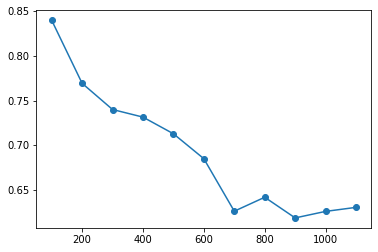

In [112]:
plt.plot(trainsize, trainacc)
plt.scatter(trainsize, trainacc)
plt.show()

In [113]:
def combinationsValGenfinal(augfun1, augfun2, train_X, train_y):

  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, combinationsfinal(train_X, 30,1.6, augfun1, augfun2))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies = Accuracy(test_y, testpred)
  return accuracies

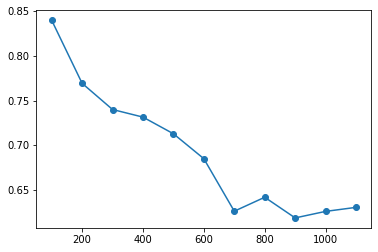

In [114]:
plt.plot(trainsize, trainacc)
plt.scatter(trainsize, trainacc)
plt.show()